#  #BuildWithAI2021 - Entrepreneurial Competency in University Students

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report,precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split

In [3]:
# Read the dataset
df = pd.read_csv('data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


### 1. Data Description

In [4]:
# Shape of data 
df.shape

(219, 17)

In [5]:
# Informational summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [27]:
# 5 point summary of numerical data
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
# Checking for nulls
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [7]:
# Value counts in y
df['y'].value_counts()

0    128
1     91
Name: y, dtype: int64

**Observation:**
1. **Reason for lack** feature contains values for only those students which do not have Entrepreneurial Competency.
2. Almost 40% records contains nulls, hence we will drop this column before proceeding for model building.

### 2. Exploratory Data Analysis

In [28]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


0    58.447489
1    41.552511
Name: y, dtype: float64


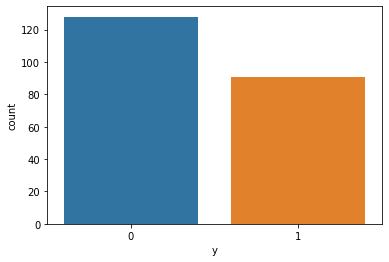

In [57]:
print(df['y'].value_counts(1) *100)
sns.countplot(df['y']);

**Inference:**
1. In this data 41.55% students have Entrepreneurial skills and 58.44% don't.

In [50]:
df.iloc[:,0].value_counts()

Engineering Sciences                                     123
Economic Sciences, Business Studies, Commerce and Law     32
Art, Music or Design                                      21
Others                                                    20
Medicine, Health Sciences                                 10
Humanities and Social Sciences                             5
Mathematics or Natural Sciences                            4
Teaching Degree (e.g., B.Ed)                               3
Language and Cultural Studies                              1
Name: EducationSector, dtype: int64

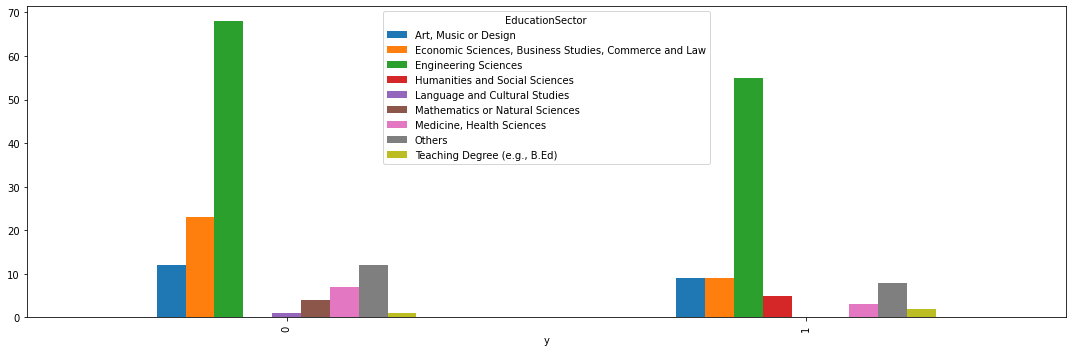

In [47]:
pd.crosstab(df['y'],df['EducationSector']).plot(kind='bar',figsize=(15,5))
plt.tight_layout()
plt.show()

**Inference:**
1. From the record of 219 students, 123 are engineers. Hence results are pretty obvious that most Engineers are showing Entrepreneurial skills.

Male      73.972603
Female    26.027397
Name: Gender, dtype: float64

y        0   1
Gender        
Female  37  20
Male    91  71


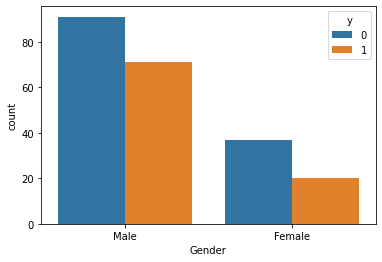

In [67]:
print(df['Gender'].value_counts(1) *100)
print()
print(pd.crosstab(df['Gender'],df['y']))
sns.countplot(df['Gender'],hue=df['y']);

**Inference:**
1. ~40% of males have Entrepreneurial skills.
2. ~35% of females have Entrepreneurial skills.

<AxesSubplot:>

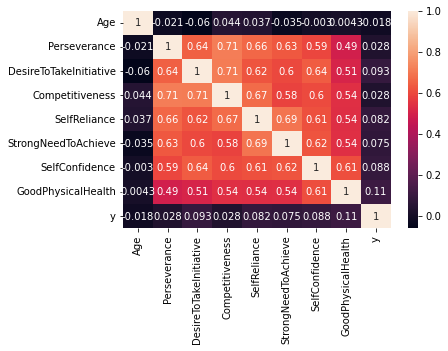

In [71]:
# Heat map
sns.heatmap(df.corr(),annot=True)

**Inference:**
1. From the heatmap we can see that features are correlated, this map cause some problem in model building.

### 3. Model Building

NOTE: After carefully studying that data we realised that 'EducationSector', 'IndividualProject', 'Age', 'Gender', 'City','GoodPhysicalHealth', 'MentalDisorder','ReasonsForLack' will not be useful in model building. Hence dropping them.

In [8]:
# relevant columns
data = df.loc[:,['Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve','KeyTraits','y']]
data.head()

,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,KeyTraits,y
0,No,2,2,3,3,2,Passion,1
1,Yes,3,3,3,4,4,Vision,0
2,No,3,4,3,3,3,Passion,0
3,Yes,3,3,3,3,4,Resilience,0
4,Yes,2,3,3,3,4,Vision,1


In [10]:
# encoding 
data["Influenced"] = data["Influenced"].astype("category").cat.codes
data["KeyTraits"] = data["KeyTraits"].astype("category").cat.codes

In [11]:
X = data.drop('y',axis=1)
y = data.y

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
col = ['Model Name','Accuracy','recall','f1','precision']
result = pd.DataFrame(columns=col)
result

,Model Name,Accuracy,recall,f1,precision


In [21]:
def model(model_name,model_est):
    
    global result
    
    model_fit = model_est.fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    
    model_scores = model_fit.score(X_test,y_test)
                         
    model_recall = recall_score(y_test, y_pred)
    
    model_f1 = f1_score(y_test, y_pred)
       
    model_precision = precision_score(y_test, y_pred)
    
    mlmodel = pd.Series({'Model Name':model_name,'Accuracy':model_scores,'recall':model_recall,
                            'f1': model_f1,'precision': model_precision})
                         
    result = result.append(mlmodel,ignore_index=True)
                         
    return result

In [22]:
lr = LogisticRegression()
model('Logistic Regression',lr)

svc = SVC()
model('SVC',svc)

cb = CatBoostClassifier()
model('catboost',cb)

xgb = XGBClassifier()
model('XG Boost',xgb)

knn = KNeighborsClassifier()
model('K Neighbours',knn)

dt = DecisionTreeClassifier()
model('Decision Tree',dt)

rf = RandomForestClassifier()
model('Random Forest',rf)

ad = AdaBoostClassifier()
model('Ada Boost',ad)

gb = GradientBoostingClassifier()
model('Gradient Boosting',gb)

xgbr = XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'])
model('XGB RF',xgbr)

lgbm = LGBMClassifier()
model('Light GBM',lgbm)

Learning rate set to 0.004622
0:	learn: 0.6923007	total: 1.22ms	remaining: 1.21s
1:	learn: 0.6916469	total: 2.45ms	remaining: 1.22s
2:	learn: 0.6913161	total: 3.58ms	remaining: 1.19s
3:	learn: 0.6903787	total: 4.79ms	remaining: 1.19s
4:	learn: 0.6891427	total: 6.28ms	remaining: 1.25s
5:	learn: 0.6878724	total: 7.56ms	remaining: 1.25s
6:	learn: 0.6873144	total: 8.65ms	remaining: 1.23s
7:	learn: 0.6867092	total: 9.59ms	remaining: 1.19s
8:	learn: 0.6857943	total: 10.6ms	remaining: 1.17s
9:	learn: 0.6849629	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6837700	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6827123	total: 13.7ms	remaining: 1.13s
12:	learn: 0.6818368	total: 14.8ms	remaining: 1.12s
13:	learn: 0.6808824	total: 15.8ms	remaining: 1.11s
14:	learn: 0.6805722	total: 16.6ms	remaining: 1.09s
15:	learn: 0.6797706	total: 17.5ms	remaining: 1.08s
16:	learn: 0.6788197	total: 18.6ms	remaining: 1.07s
17:	learn: 0.6780905	total: 19.7ms	remaining: 1.08s
18:	learn: 0.6772718	total: 20.7ms	remaining

308:	learn: 0.5188628	total: 301ms	remaining: 674ms
309:	learn: 0.5185100	total: 303ms	remaining: 673ms
310:	learn: 0.5182554	total: 303ms	remaining: 672ms
311:	learn: 0.5176741	total: 305ms	remaining: 672ms
312:	learn: 0.5172565	total: 306ms	remaining: 671ms
313:	learn: 0.5167337	total: 307ms	remaining: 670ms
314:	learn: 0.5162629	total: 308ms	remaining: 669ms
315:	learn: 0.5158458	total: 308ms	remaining: 668ms
316:	learn: 0.5154329	total: 309ms	remaining: 667ms
317:	learn: 0.5151186	total: 310ms	remaining: 666ms
318:	learn: 0.5148192	total: 311ms	remaining: 665ms
319:	learn: 0.5143349	total: 312ms	remaining: 663ms
320:	learn: 0.5143043	total: 313ms	remaining: 662ms
321:	learn: 0.5140275	total: 314ms	remaining: 661ms
322:	learn: 0.5134776	total: 315ms	remaining: 660ms
323:	learn: 0.5132014	total: 316ms	remaining: 659ms
324:	learn: 0.5127857	total: 317ms	remaining: 658ms
325:	learn: 0.5123439	total: 318ms	remaining: 657ms
326:	learn: 0.5119857	total: 319ms	remaining: 656ms
327:	learn: 

472:	learn: 0.4688562	total: 454ms	remaining: 505ms
473:	learn: 0.4684166	total: 455ms	remaining: 505ms
474:	learn: 0.4682482	total: 456ms	remaining: 504ms
475:	learn: 0.4679602	total: 457ms	remaining: 503ms
476:	learn: 0.4676607	total: 459ms	remaining: 503ms
477:	learn: 0.4675737	total: 460ms	remaining: 502ms
478:	learn: 0.4670895	total: 461ms	remaining: 501ms
479:	learn: 0.4670110	total: 462ms	remaining: 500ms
480:	learn: 0.4667528	total: 463ms	remaining: 499ms
481:	learn: 0.4664980	total: 464ms	remaining: 499ms
482:	learn: 0.4660367	total: 465ms	remaining: 498ms
483:	learn: 0.4657634	total: 466ms	remaining: 497ms
484:	learn: 0.4652739	total: 467ms	remaining: 496ms
485:	learn: 0.4648895	total: 468ms	remaining: 495ms
486:	learn: 0.4645223	total: 469ms	remaining: 494ms
487:	learn: 0.4642317	total: 470ms	remaining: 493ms
488:	learn: 0.4639053	total: 472ms	remaining: 493ms
489:	learn: 0.4634438	total: 473ms	remaining: 492ms
490:	learn: 0.4632076	total: 474ms	remaining: 491ms
491:	learn: 

768:	learn: 0.4000180	total: 761ms	remaining: 229ms
769:	learn: 0.3998364	total: 762ms	remaining: 228ms
770:	learn: 0.3997725	total: 763ms	remaining: 227ms
771:	learn: 0.3996129	total: 764ms	remaining: 226ms
772:	learn: 0.3993812	total: 765ms	remaining: 225ms
773:	learn: 0.3990856	total: 766ms	remaining: 224ms
774:	learn: 0.3987144	total: 767ms	remaining: 223ms
775:	learn: 0.3985224	total: 768ms	remaining: 222ms
776:	learn: 0.3983140	total: 770ms	remaining: 221ms
777:	learn: 0.3981840	total: 771ms	remaining: 220ms
778:	learn: 0.3978821	total: 772ms	remaining: 219ms
779:	learn: 0.3976206	total: 772ms	remaining: 218ms
780:	learn: 0.3974125	total: 773ms	remaining: 217ms
781:	learn: 0.3973355	total: 774ms	remaining: 216ms
782:	learn: 0.3971062	total: 775ms	remaining: 215ms
783:	learn: 0.3969124	total: 776ms	remaining: 214ms
784:	learn: 0.3966595	total: 778ms	remaining: 213ms
785:	learn: 0.3965775	total: 779ms	remaining: 212ms
786:	learn: 0.3963495	total: 780ms	remaining: 211ms
787:	learn: 

[19:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model Name,Accuracy,recall,f1,precision
0,Logistic Regression,0.621212,0.36,0.418605,0.500000
1,SVC,0.621212,0.16,0.242424,0.500000
2,catboost,0.681818,0.52,0.553191,0.590909
3,XG Boost,0.727273,0.64,0.640000,0.640000
4,K Neighbours,0.606061,0.56,0.518519,0.482759
5,Decision Tree,0.651515,0.48,0.510638,0.545455
6,Random Forest,0.696970,0.60,0.600000,0.600000
7,Ada Boost,0.621212,0.40,0.444444,0.500000
8,Gradient Boosting,0.651515,0.52,0.530612,0.541667
9,XGB RF,0.742424,0.60,0.638298,0.681818


In [23]:
result.sort_values('Accuracy',ascending=False)

,Model Name,Accuracy,recall,f1,precision
9,XGB RF,0.742424,0.60,0.638298,0.681818
3,XG Boost,0.727273,0.64,0.640000,0.640000
10,Light GBM,0.727273,0.52,0.590909,0.684211
6,Random Forest,0.696970,0.60,0.600000,0.600000
2,catboost,0.681818,0.52,0.553191,0.590909
5,Decision Tree,0.651515,0.48,0.510638,0.545455
8,Gradient Boosting,0.651515,0.52,0.530612,0.541667
0,Logistic Regression,0.621212,0.36,0.418605,0.500000
1,SVC,0.621212,0.16,0.242424,0.500000
7,Ada Boost,0.621212,0.40,0.444444,0.500000


<AxesSubplot:xlabel='Accuracy', ylabel='Model Name'>

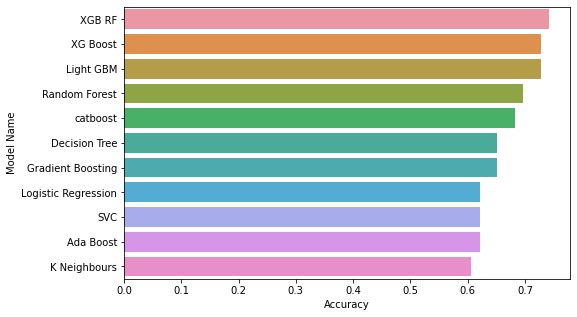

In [24]:
x = result.sort_values('Accuracy',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x['Accuracy'],x['Model Name'])

**RESULT:**
1. We were able to build a classifier with 74.2% accuracy using Extreme Gradient Boosting with Random forest ensemble.